# Why are our customers churning?

### Acquire

In [22]:
import acquire
import numpy as np
import pandas as pd

telco = acquire.get_telco()

In [2]:
telco.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
payment_type_id             7043 non-null int64
internet_service_type_id    7043 non-null int64
contract_type_id            7043 non-null int64
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
monthly_charges 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Show distributions of all numeric data
for feature in telco.select_dtypes(include=[float, int]):
     sns.distplot(telco[feature])
     plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

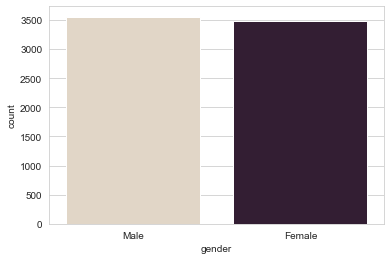

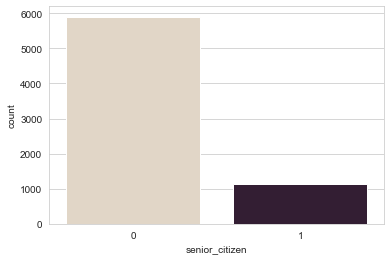

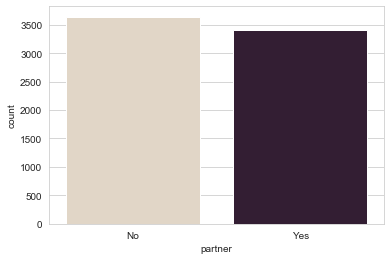

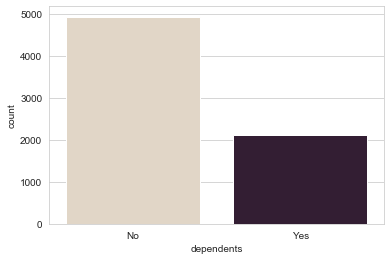

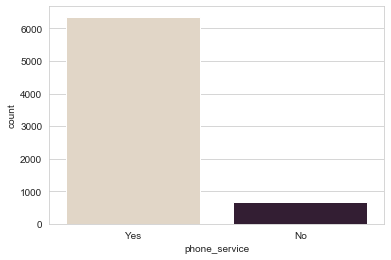

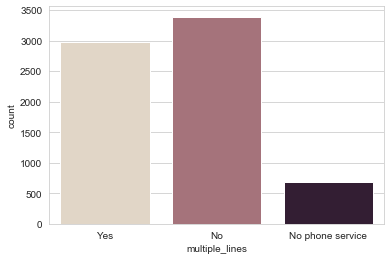

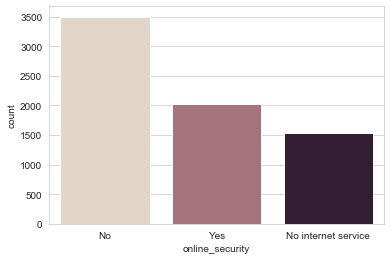

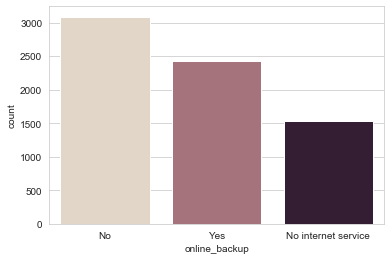

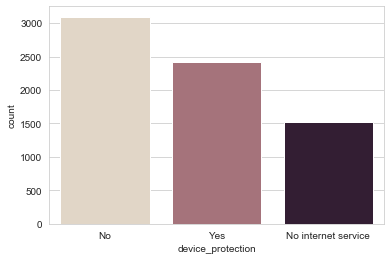

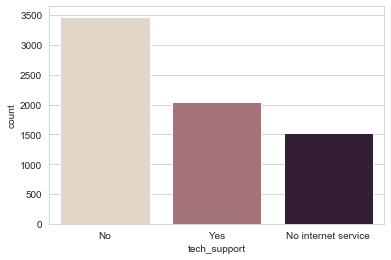

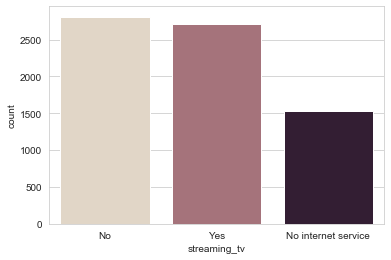

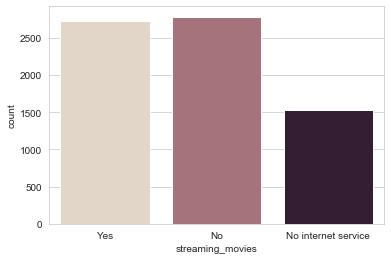

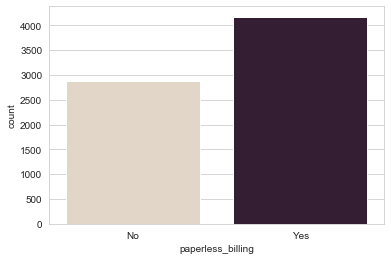

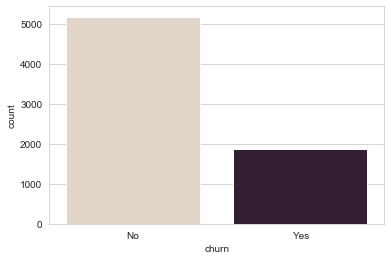

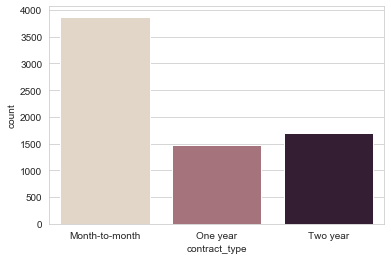

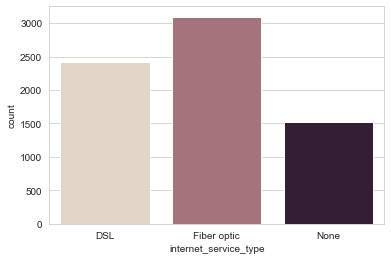

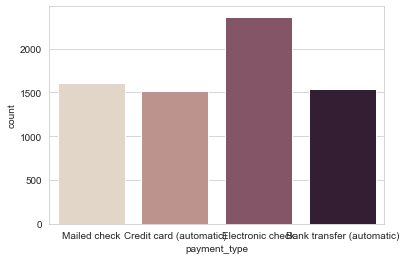

In [5]:
categorical = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service',
                        'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                       'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                       'churn', 'contract_type', 'internet_service_type', 'payment_type']

for feature in categorical:
    sns.countplot(x=feature, palette="ch:.25", data=telco)
    plt.show()

There are a lot of variables regarding additional internet services, so let's visualize those, ignoring clients without internet.

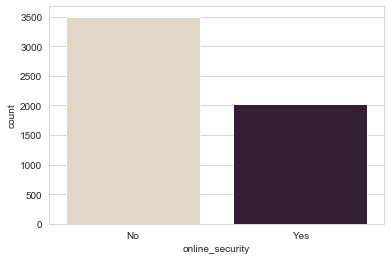

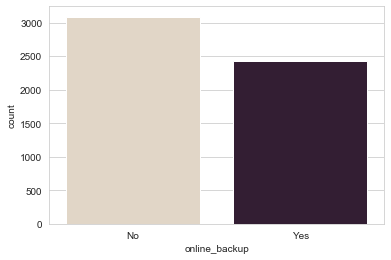

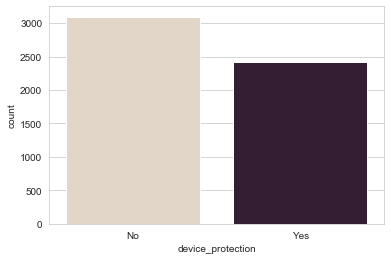

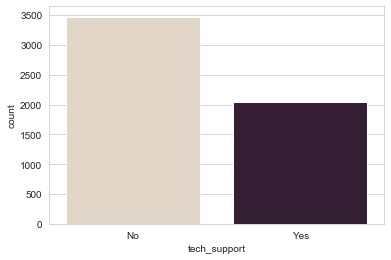

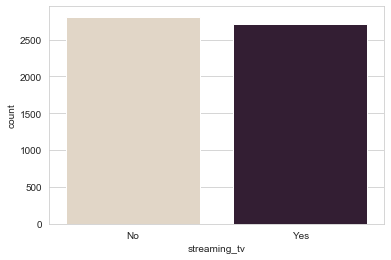

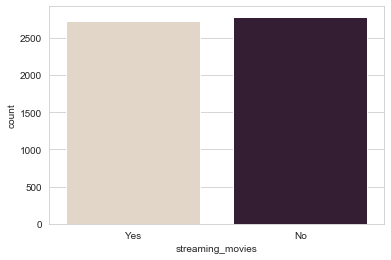

In [6]:
internet = telco[telco.internet_service_type != "None"]

internet_features = ['online_security', 'online_backup', 'device_protection','tech_support',
                     'streaming_tv', 'streaming_movies']

for feature in internet_features:
    sns.countplot(x=feature, data=internet, palette='ch:.25')
    plt.show()

## Prepare

In [7]:
# Missing values?

telco.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [13]:
# Total_charges seems to be the wrong datatype!

# telco.total_charges.astype(float)
# returns an error 

In [14]:
# I wonder why that didn't work. Let's have a look.

telco.total_charges.value_counts(dropna=False)

20.2       11
           11
19.75       9
19.9        8
19.65       8
20.05       8
45.3        7
19.55       7
20.25       6
20.15       6
19.45       6
20.3        5
20.45       5
75.3        4
69.65       4
50.15       4
69.95       4
70.6        4
19.5        4
19.85       4
20.5        4
19.95       4
19.2        4
19.4        4
49.9        4
44          4
74.7        4
20.4        4
69.9        4
69.6        4
           ..
76.65       1
5253.95     1
4048.95     1
4995.35     1
422.3       1
546.45      1
4929.55     1
383.55      1
215.25      1
6993.65     1
5194.05     1
3616.25     1
2931        1
5071.05     1
465.45      1
2048.8      1
6822.15     1
1444.05     1
653.9       1
212.3       1
560.6       1
45.55       1
4459.15     1
1101.85     1
5817        1
2587.7      1
819.55      1
388.6       1
6109.75     1
248.95      1
Name: total_charges, Length: 6531, dtype: int64

In [15]:
# Still not clear.
# Let's look for those pesky values we can't cast to float

def can_it_float(value):
    ''' a function to check whether a value will successfully cast to float
        returns True if can be cast to float, otherwise False
    '''
    try:
        float(value)
    except:
        return False
    else:
        return True

telco[~telco.total_charges.apply(can_it_float)]

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
1878,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
1949,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
2029,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
2048,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
2132,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
6143,2,3,2,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
6569,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
6605,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
6615,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
6686,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check


In [16]:
# They're all blank strings. Looking at this, they also all have a tenure of 0.
# Thus, we can reasonably impute that the total_charges ought to be 0. This is handled in our prep function.

In [17]:
import prep

X_train, X_test, y_train, y_test, data_dict = prep.prep_telco(telco)

## Explore

#### Do certain tenure cohorts have a higher churn rate?

Text(0, 0.5, 'churn rate')

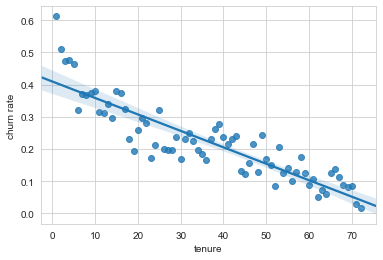

In [42]:
train = X_train
train['churn'] = y_train['churn']

churn_tenure = train.groupby('tenure').churn.mean()

sns.regplot(np.arange(1,73), churn_tenure[1:])
plt.xlabel('tenure')
plt.ylabel('churn rate')

Looks like churn rates decrease with greater tenure.

#### Are there features that indicate a higher propensity to churn?

#### Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

#### If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

#### Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

#### How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

#### How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

#### Create visualizations exploring the interactions of variables (independent with independent and independent with dependent). The goal is to identify features that are related to churn, identify any data integrity issues, understand 'how the data works'. For example, we may find that all who have online services also have device protection. In that case, we don't need both of those. (The visualizations done in your analysis for questions 1-5 count towards the requirements below)

#### What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.